<a href="https://colab.research.google.com/github/MLLSCKR/GAN-Related-Paper-Repository/blob/master/MarkovChainMonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [33]:
%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from functools import partial

In [35]:
np.random.seed(1234)

## Bayesian Data Analysis

The fundamental objective of Bayesian data analysis is to determine the posterior distribution.

$$p(\theta|X)=\frac{p(X|\theta)p(\theta)}{p(X)}$$

where the denominator is

$$p(X) = \int p(X|\theta^*)p(\theta^*)d\theta^*$$

The computational issue is the difficulty of evaluating the integral in the denominator. There are many ways to address thid difficulty.
* In cases with conjugate priors (with conjugate priors, the posterior has the same distribution as the prior), we can get closed form solutions.
* We can use numerical integration
* We can approximate the functions used to calculate the posterior with simpler functions and show that the resulting approximate posterior is "close" to true posterior (variational Bayes)
* We can use Monte Carlo methods, of which the most important is Markov Chain Monte Carlo.


## Bayes' Theorem

Bayes theorem에서는 아래와 같이 두 개의 변수 A, B 가 있을 때, 이들의 조건부 확률은 한쪽의 조건부 확률에서 다른 쪽의 조건부 확률을 계산할 수 있는데, 이때 이들 각각의 Marginal 확률 $p(A)$ or $p(B)$가 필요하다.

$$ p(A|B)=\frac{p(A, B)}{p(B)}=\frac{p(A)p(B|A)}{p(B)} $$

* $p(A)$ : prior probability
* $p(B|A)$: likelihood
* $p(B)$: evidence

A를 모수에 상응하여 생각하고 B를 sample data에 상응하여 생각할 수 있다.

\\

Data science에서 흔히 사용하는 notation으로 변환하여 표현하면 아래와 같다.

$$ p(\theta|X)= \frac{p(\theta)p(X|\theta)}{p(X)} $$

* $\theta$: parameter
* $X$: sample(관찰한 값) data
* $p(\theta)$: prior probability
* $p(X|\theta)$: likelihood
  * $\theta$가 주어진 상태에서의 $X$의 확률
* $p(X)$: evidence
  * sample data($X$)의 marginal probability

\\

결국 posterior probability는 prior probabiltiy와 likelihood의 곱에서 evidence를 나눈 값이 된다.
$$ posterior = \frac{prior \times likelihood}{evidence} $$

위의 개념에 대해서 좀 더 깊게 들어가보자.

먼저, prior probability는 어떤 것에 대해 사전에(미리) 아는 값을 의미한다. 무엇을 아는가? 라고 하면 Bayesian Inference에서는 parameter(모수)에 대해서 미리 어느 정도의 정보를 안다고 보면 된다.

이러한 prior probability에 대한 정보는 보통 통계나 수학적인 공식적인 측면보다는 특정 상황이나 사건에서 그 상황 자체의 정보를 활용해야 하는 경우가 대부분이다. 생물 data의 경우, 생물 data 속에 숨어있는 의미나, 이미 알고 있는 정보들을 활용하여 이러한 prior probability를 최대한 정확하게 조정하거나, 사용할 수 있다. 이 prior probability가 정확할 수록 posterior distribution을 최대화 하며 parameter($\theta$)를 학습할 때, 잘못된 곳으로 최적화가 되는 문제를 줄여준다.

likelihood는 parameter가 주어진 상태에서 data의 probability가 likelihood이다. **여기서 paramter는 어떤 것도 될 수 있는데, 우리가 가정하는 distribution이 있어야 한다.** 즉, data가 어떠한 분포를 따를 것이라고 하는 것 정도는 분석자가 알고 있거나, 가정해야 한다. 만약 정규분포를 가정한다면 이에 해당하는 parameter는 평균과 분산이 parameter가 될 수 있다.



## Bayesian Theory의 또 다른 설명

1. 빈도 확률(Frequentist probability) vs Bayesian probability
* Frequentist probability
  * '동전의 앞면'이 나올 확률은 어떻게 구할까?
    
    * 10번 던졌을 때 4번이 앞면이면, 앞면이 나올 확률 = 2/5

    * 100번 던졋을 때 45개가 앞면이면, 앞면이 나올 확률 = 45/100

    이런식으로 시행횟수를 반복하여 빈도수(Frequency)를 측정하게 되면, 우리에게 익숙한 Frequentist probability를 계산할 수 있다.
  
* Bayesian probability
  * '화산이 폭발할 확률'을 Frequentist probability로 계산할 수 있을까? 매우 어려울 것이다. 우리가 동전 던지듯이 화산을 폭발시킬 수 없기에 Frequentist probability로는 신뢰할 만한 값을 얻기 어렵다. 세상에는 반복할 수 없는 사건이 무수히 많고, Frequentist probability의 개념은 그러한 사건에 적용할 수 없다. 일어나지 않은 일에 대한 확률을 불확실성(uncertainty)의 개념, 즉, 사건과 관련있는 여러 확률을 이용해 새롭게 일어날 사건을 추정하는 것이 bayesian probability이다.

\\

2. Bayesian probability의 정의
* Bayes' theorem이라 불리며, 종속적(의존적) 관계에 놓인 사건들을 기반으로 확률을 구한다.
* 두 확률 변수의 prior probability와 posterior probability 사이의 관계를 나타내는 정리.
* prior probability $p(A)$와 likelihood probability $p(B|A)$를 안다면 posterior probability $p(A|B)$를 알 수 있다.
* Bayesian probability는 아래의 수식으로 표현되며, 정보를 update하면서 posterior probability $p(A|B)$를 구하는 것이다.

$$p(A|B)=\frac{p(B|A)p(A)}{p(B)}$$

* $p(A)$, prior probability: 결과가 나타나기 전에 결정되어 있는 A(원인)의 확률
* $p(B|A)$, likelihood probability: A(원인)이 발생하였다는 조건하에서 B(결과)가 발생할 확률
* $p(A|B)$, posterior probability: B(결과)가 발생하였다는 조건하에서 A(원인)이 발생할 확률.

\\

ex1)  A씨가 Breast cancer 검사결과 양성으로 판정받았다. A씨가 실제 Breast cancer일 확률은?

(Conditions)
* Breast cancer 검사의 정확도 = 90%
* Breast cancer에 걸릴 확률 = 1%

(해설)

문제의 목표는 양성반응일때 실제 Breast cancer일 확률을 구하는 것이다.

$$p(Breast|Positive) = \frac{p(Positive|Breast) \times p(Breast)}{p(Positive)}$$

* $p(Positive|Breast)=0.9$, $p(Positive|Not\ Breast)=0.1$
* $p(Breast)=0.01$, $p(Not\ Breast)=0.99$
* $p(Positive)=p(Positive|Breast)\times p(Breast)+p(Positive|Not\ Breast)\times p(Not\ Breast)\\=0.9 \times 0.01 + 0.1 \times 0.99 = 0.108$

$$p(Breast|Positive) = \frac{p(Positive|Breast) \times p(Breast)}{p(Positive)} = \frac{0.9 \times 0.01}{0.108}=0.083$$

A씨가 Breast 검사에서 양성일 경우, 실제 Breast Cancer일 확률은 8.3%이다.

\\

ex2) 주어진 조건들을 이용하여 여성일 확률을 계산하라.

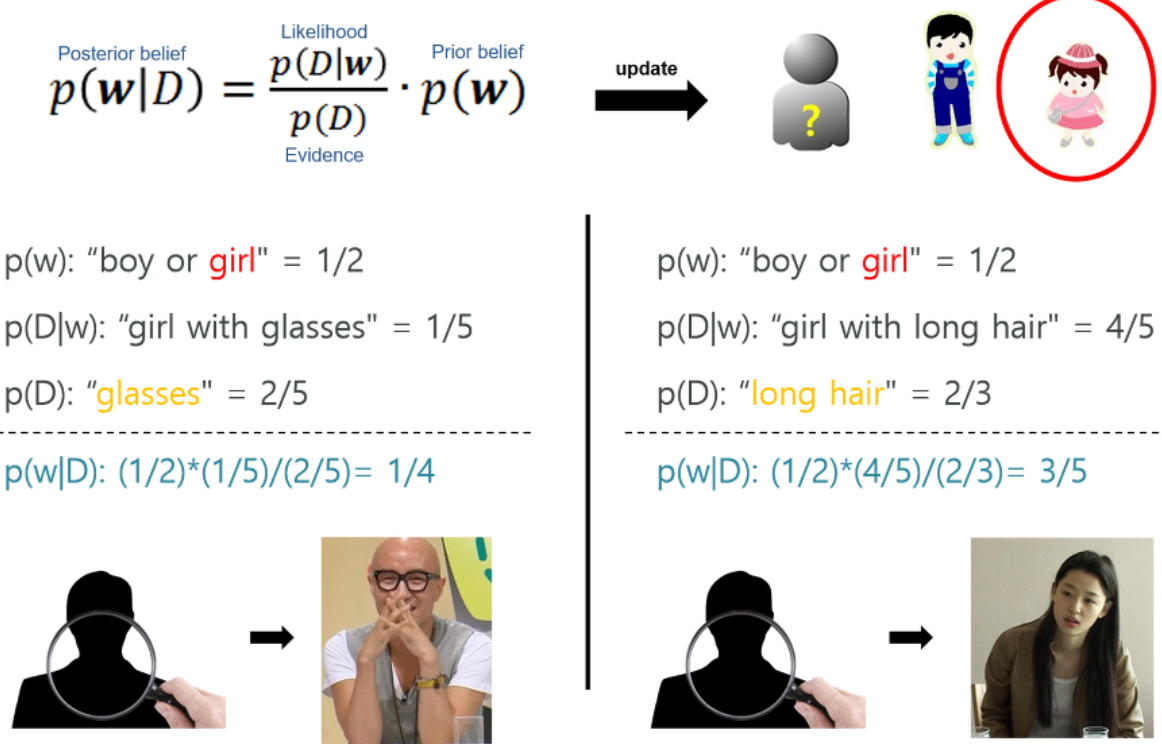

Bayesian Probability는 Machine Learning 이해에 굉장히 중요하다.

**Machine Learning은 dataset이 주어졌을 때, 특정 사건 혹은 가설을 확률을 높여줄 수 있는 최적의 모델을 찾는 것을 목적으로 한다.** 따라서, Bayesian model이 주어진 정보를 update 해나가면서, 최적의 posterior distribution을 계산하는 방식과 일맥상통한다.

## Analytical solution

The way to address computational issue for evaluating the integral in the denominator
* In cases with conjugate priors (with conjugate priors, the posterior has the same distribution as the prior), we can get closed form solutions.

    Bayesian 확률 이론에서는 posterior에 초점을 둔다. 결국 Bayesian에서는 posterior이 최종적으로 최대화 시키고 싶은 대상이기 때문에 posterior 확률을 구성하고 있는 prior 확률에 관심을 가지게 된다.

    Bayesian 확률에서는 만약 posterior 확률이 prior 확률 분포와 같은 분포 계열에 속하게 되면 이때의 prior probability distribution을 **Conjugate Prior**이라 부른다. prior distribution과 posterior distribution이 같은 분포 계열이라는 것을 안다는 것은 prior distribution을 통해 posterior distribution이 결정적으로 형태를 알 수 있다는 의미이기도 하다.
    
    이러한 Conjugate prior이 되는 상황에서는 계산적으로 유리한데, closed form(closed form solution은 문제에 대한 해답을 명확하게 식으로 제시할 수 있다는 것)의 사후 확률을 얻을 수 있어서 수치적분이 아닌, 해석적으로 적분을 할 수 있다.



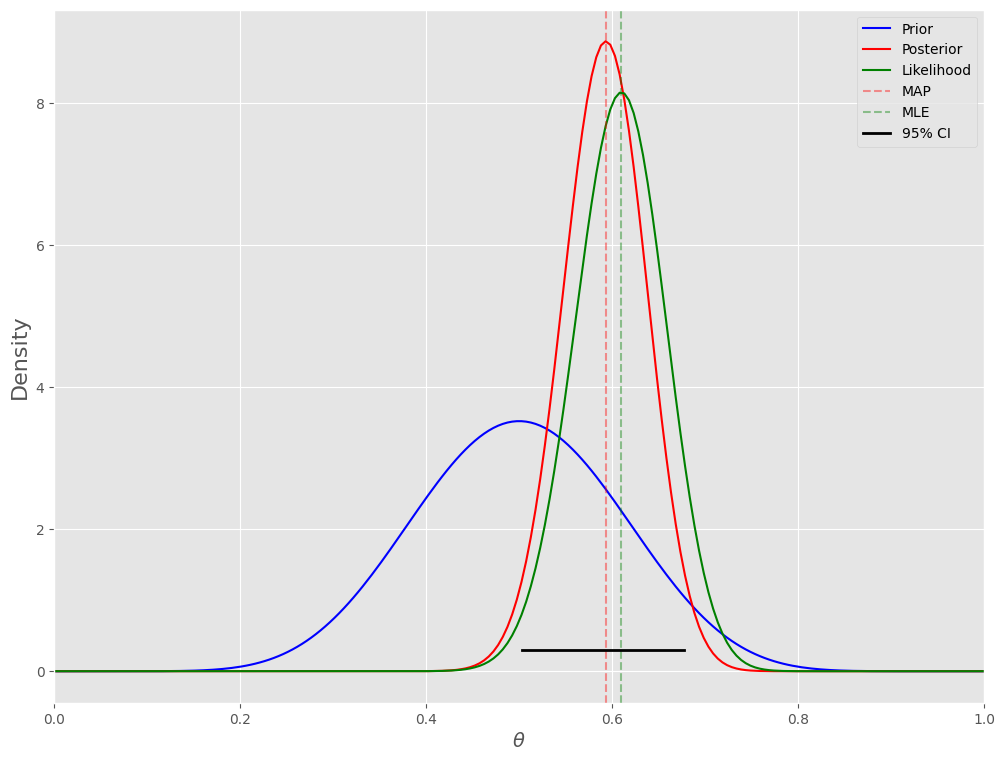

In [36]:
n = 100
h = 61
p = h/n

rv = st.binom(n, p)
mu = rv.mean()

a, b = 10, 10
prior = st.beta(a, b)
post = st.beta(h+a, n-h+b)
ci = post.interval(0.95)

thetas = np.linspace(0, 1, 200)
plt.figure(figsize=(12, 9))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.plot(thetas, n*st.binom(n, thetas).pmf(h), label='Likelihood', c='green')
plt.axvline((h+a-1)/(n+a+b-2), c='red', linestyle='dashed', alpha=0.4, label='MAP')
plt.axvline(mu/n, c='green', linestyle='dashed', alpha=0.4, label='MLE')
plt.xlim([0, 1])
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

## Numerical Integration(수치 적분)

One simple way of numerical integration is to estimate the values on grid of values for $\theta$. To calculate the posterior, we find the prior and the likelihood for each value of $\theta$, and for the marginal likelihood, we replace the integral with the equivalent sum

$$p(X)=\sum_{\theta^*}p(X|\theta^*)p(\theta^*)$$

**One advantage of this is that the prior does not have to be conjugate** (although the example below uses the same beta prior for ease of comparison), and so we are not restricted in our choice of an appropriate prior distribution.

**The disadvantage, of course, is that this is computationally very expensive when we need to estimate multiple parameters, since the number of grid points grows as $O(n^d)$**, where $n$ defined the grid resolution and $d$ is the size of $\theta$.

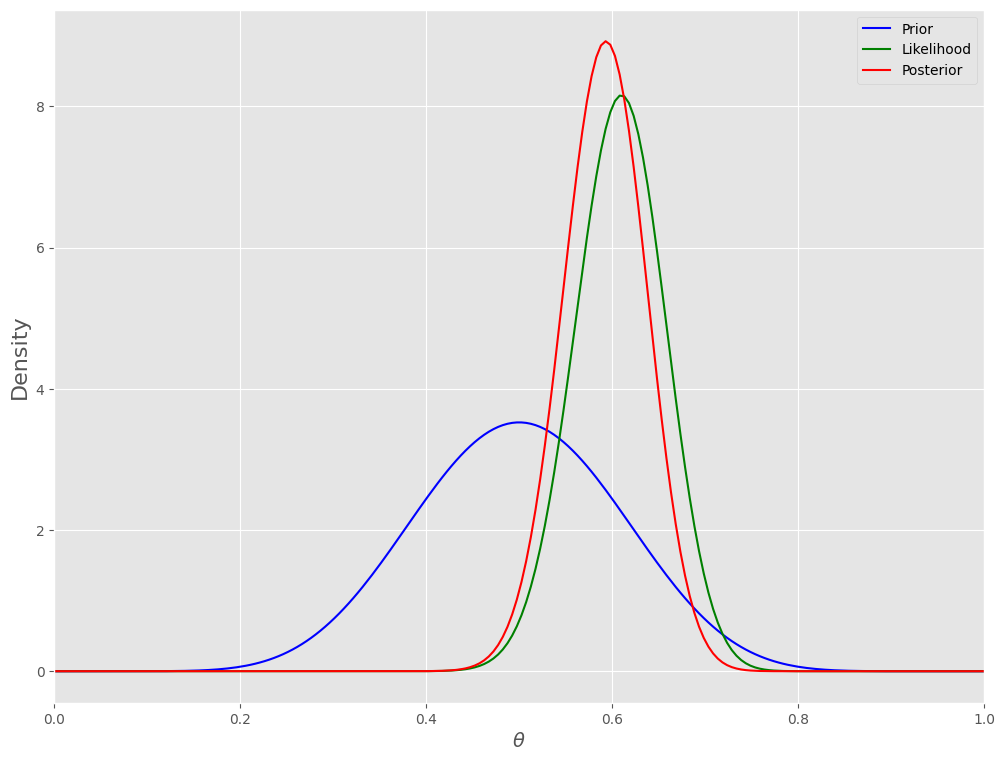

In [37]:
thetas = np.linspace(0, 1, 200)
prior = st.beta(a, b)

post = prior.pdf(thetas) * st.binom(n, thetas).pmf(h)
post /= (post.sum() / len(thetas))

plt.figure(figsize=(12, 9))
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, n*st.binom(n, thetas).pmf(h), label='Likelihood', c='green')
plt.plot(thetas, post, label='Posterior', c='red')
plt.xlim([0, 1])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

## Metropolis-Hastings sampler

In Bayesian statistics, we want to estimate the posterior distribution, but this is often intractable due to the high-dimensional integral in the denominator (marginal likelihood). A few other ideas we have encountered that are also relevant here are Monte Carlo integration with independent samples and the use of proposal distributions (e.g. rejection and importance sampling). We can approximate the posterior $p(\theta|X)$ if we can somehow draw many smaples that come from the posterior distribution. With vanilla Monte Carlo integration, we need the samples to be independent draws from the posterior distribution, which is a problem if we do not actually know what the posterior distribution is.

With MCMC, we draw samples from a (simple) proposal distribution so that each draw depends only on the state of the previous draw (i.e. the samples from a Markov chain). The nice thing is that this target distribution only needs to be proportional to the posterior distribution, which means we don't need to evaluate the potentially intractable marginal likelihood, which is just a normalizing constant. We can find such a target distribution easily.

$$posterior \propto likelihood \times prior$$

After some time, the Markov chain of accepted draws will converge to the stationary distribution, and we can use those samples as (correlated) draws from the posterior distribution, and find functions of the posterior distribution in the same way as for vanila Monte Carlo integration.



### Metropolis-Hastings Sampler process

Given an initial guess for $\theta$ with positive probability of being drawn, the Metropolis-Hastings algorithm proceeds as follows.

To carry out the Metropolis-Hastings algorithm, we need to draw random samples from the following distributions

**(Burn-in process)**

Running Markov chain until it reaches its equilibrium distribution is called burning in the Markov chain.

After the chain has reached equilibrium, a sequence of infinitely many samples may be drawn from the equilibrium distribution.

* Choose a new proposed value($\theta_p$) such that $\theta_p = \theta + \bigtriangleup\theta$ where $\bigtriangleup\theta\sim \mathcal{N}(0, \sigma)$
* Calculate the ratio
$$\rho=\frac{g(\theta_p|X)}{g(\theta|X)}$$
    where g is the posterior probability.
* If the proposal distribution is not symmectrical, we need to weight the acceptance probability to maintain detailed balance (reversibility) of the stationary distribution, and instead calculate
$$\rho = \frac{g(\theta_p|X)p(\theta|\theta_p)}{g(\theta|X)p(\theta_p|\theta)}$$
$$\rho = \frac{p(X|\theta_p)p(\theta_p)}{p(X|\theta)p(\theta)}$$

* Update parameters
  * If $\rho \ge 1$, then set $\theta = \theta_p$
  * If $\rho < 1$, then set $\theta = \theta_p$(update) with probability $\rho$, otherwise set $\theta = \theta$(no update)
* Repeat the earlier steps


**(After Markov Chain Convergence, After Burn-in process)**

After some number of iterations $k$, the samples $\theta_{k+1}$, $\theta_{k+2}$, ... will be samples from the posterior distributions.

Here are initial concepts to help your intuition about why this is so:
* We accept a proposed move to $\theta_{k+1}$ whenever the density of the (unnormalized) target distribution at $\theta_{k+1}$ is larger than the value of $\theta_{k}$ -> So $\theta$ will more often be found in places where the target distribution is denser.
* If this was all we accepted, $\theta$ would get stuck at a local mode of the target distribution, so we also accept occasional moves to lower density regions. It turns out that the correct probability of doing so is given by the ratio $\rho$.
* The acceptance criteria only looks at ratios of the target distribution, so the denominator cancels out and does not matter - that is why we only need samples from a distribution proportional to the posterior distribution.
* So, $\theta$ will be expected to bounce around in such a way that its spends its time in places proportional to the density of the posterior distribution.

In [38]:
def target(lik, prior, n, h, theta):
  if theta < 0 or theta > 1:
    return 0
  else:
    return lik(n, theta).pmf(h)*prior.pdf(theta)

n = 100
h = 61
a = 10
b = 10
lik = st.binom
prior = st.beta(a, b)
sigma = 0.3

naccept = 0
theta = 0.1
niters = 10000
samples = np.zeros(niters+1)
samples[0] = theta
for i in range(niters):
  theta_p = theta + st.norm(0, sigma).rvs()
  rho = min(1, target(lik, prior, n, h, theta_p)/target(lik, prior, n, h, theta ))
  u = np.random.uniform()
  if u < rho:
    naccept += 1
    theta = theta_p
  samples[i+1] = theta
nmcmc = len(samples)//2
print("Efficiency = {}".format(naccept/niters))

Efficiency = 0.19


In [39]:
samples

array([0.1   , 0.2414, 0.2414, ..., 0.6138, 0.6138, 0.6138])

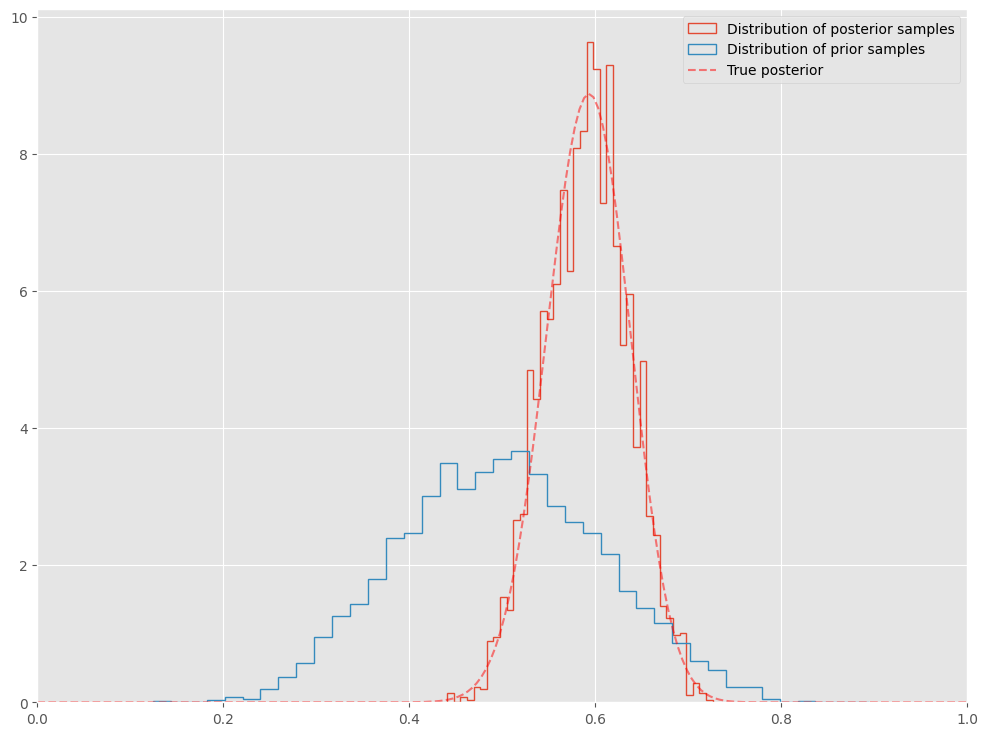

In [40]:
post = st.beta(h+a, n-h+b)

plt.figure(figsize=(12, 9))
plt.hist(samples[nmcmc:], 40, histtype='step', density=True, linewidth=1, label='Distribution of posterior samples');
plt.hist(prior.rvs(nmcmc), 40, histtype='step', density=True, linewidth=1, label='Distribution of prior samples');
plt.plot(thetas, post.pdf(thetas), c='red', linestyle='--', alpha=0.5, label='True posterior')
plt.xlim([0,1]);
plt.legend(loc='best');

Trace plots are often used to informally assess for stochastic convergence. **Rigorous demonstration of convergence is an unsolved problem**, but simple ideas such as running multiple chains and checking that they are converging to similar distributions are often employed in practice.

In [41]:
def mh_coin(niters, n, h, theta, lik, prior, sigma):
    samples = [theta]
    while len(samples) < niters:
        theta_p = theta + st.norm(0, sigma).rvs()
        rho = min(1, target(lik, prior, n, h, theta_p)/target(lik, prior, n, h, theta ))
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
        samples.append(theta)
    return samples

In [42]:
n = 100
h = 61
lik = st.binom
prior = st.beta(a, b)
sigma = 0.05
niters = 100

sampless = [mh_coin(niters, n, h, theta, lik, prior, sigma) for theta in np.arange(0.1, 1, 0.2)]

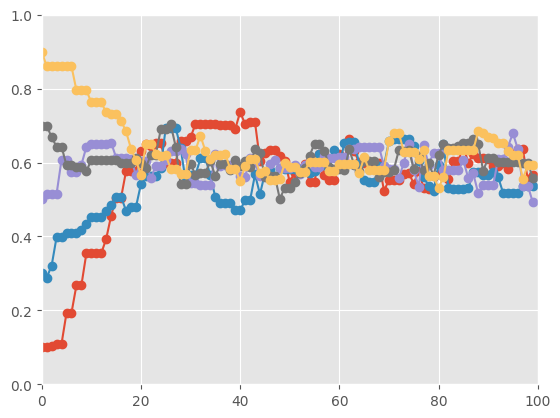

In [43]:
# Convergence of multiple chains

for samples in sampless:
    plt.plot(samples, '-o')
plt.xlim([0, niters])
plt.ylim([0, 1]);

### Metropolis-Hastings에 대한 다른 설명

다른 Metropolis-Hastings algorithm process에 대한 설명을 보면 이전에 설명한 내용과 달리 아래와 같은 process를 제시하는 경우가 많다. 아래의 process에 대한 code를 구현하고 살펴볼 것이다.

Initialize starting state $x^{(0)}$
- Burn-in: while samples have “not converged”
    - $x=x^{(t)}$
    - $t=t+1$
    - Sample $x^* \sim q(x^*|x)$ // draw from proposal
    - Sample $u\sim Uniform(0, 1)$ // draw acceptance thershold
      - If $u < A(x^*|x)=\min(1, \frac{p(x^*)q(x|x^*)}{p(x)q(x^*|x)}),\ x^{(t)}=x^*$ // transition
      - Else $x^{(t)}=x$ // stay in current state
    - Repeat until converging.

In [44]:
def mcmc_updater(curr_state, curr_likeli,
      likelihood, proposal_distribution):
    """ Propose a new state and compare the likelihoods

    Given the current state (initially random),
      current likelihood, the likelihood function, and
      the transition (proposal) distribution, `mcmc_updater` generates
      a new proposal, evaluate its likelihood, compares that to the current
      likelihood with a uniformly samples threshold,
    then it returns new or current state in the MCMC chain.

    Args:
        curr_state (float): the current parameter/state value
        curr_likeli (float): the current likelihood estimate
        likelihood (function): a function handle to compute the likelihood
        proposal_distribution (function): a function handle to compute the
          next proposal state

    Returns:
        (tuple): either the current state or the new state
          and its corresponding likelihood
    """
    # Generate a proposal state using the proposal distribution
    # Proposal state == new guess state to be compared to current
    proposal_state = proposal_distribution(curr_state)

    # Calculate the acceptance criterion
    prop_likeli = likelihood(proposal_state)
    accept_crit = prop_likeli / curr_likeli

    # Generate a random number between 0 and 1
    accept_threshold = np.random.uniform(0, 1)

    # If the acceptance criterion is greater than the random number,
    # accept the proposal state as the current state
    if accept_crit > accept_threshold:
        return proposal_state, prop_likeli

    # Else
    return curr_state, curr_likeli

In [45]:
import numpy as np

def metropolis_hastings(
        likelihood, proposal_distribution, initial_state,
        num_samples, stepsize=0.5, burnin=0.2):
    """ Compute the Markov Chain Monte Carlo

    Args:
        likelihood (function): a function handle to compute the likelihood
        proposal_distribution (function): a function handle to compute the
          next proposal state
        initial_state (list): The initial conditions to start the chain
        num_samples (integer): The number of samples to compte,
          or length of the chain
        burnin (float): a float value from 0 to 1.
          The percentage of chain considered to be the burnin length

    Returns:
        samples (list): The Markov Chain,
          samples from the posterior distribution
    """
    samples = []

    # The number of samples in the burn in phase
    idx_burnin = int(burnin * num_samples)

    # Set the current state to the initial state
    curr_state = initial_state
    curr_likeli = likelihood(curr_state)

    for i in range(num_samples):
        # The proposal distribution sampling and comparison
        #   occur within the mcmc_updater routine
        curr_state, curr_likeli = mcmc_updater(
            curr_state=curr_state,
            curr_likeli=curr_likeli,
            likelihood=likelihood,
            proposal_distribution=proposal_distribution
        )

        # Append the current state to the list of samples
        if i >= idx_burnin:
            # Only append after the burnin to avoid including
            #   parts of the chain that are prior-dominated
            samples.append(curr_state)

    return samples

In [46]:
def likelihood(x):
    # Standard Normal Distribution
    # An underlying assumption of linear regression is that the residuals
    # are Gaussian Normal Distributed; often, Standard Normal distributed
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

In [47]:
def proposal_distribution(x, stepsize=0.5):
    # Select the proposed state (new guess) from a Gaussian distribution
    #  centered at the current state, within a Guassian of width `stepsize`
    return np.random.normal(x, stepsize)

In [48]:
np.random.seed(42)

initial_state = 0  # Trivial case, starting at the mode of the likelihood
num_samples = int(1e4)
burnin = 0.2

samples = metropolis_hastings(
    likelihood,
    proposal_distribution,
    initial_state,
    num_samples,
    burnin=burnin
)

## Gibbs Sampler

Suppose we have a vector of parameters $\theta=(\theta_1, \theta_2, \cdots, \theta_k)$, and we want to estimate the joint posterior distribution $p(\theta|X)$.

Suppose we can find and draw random samples from all the conditional distributions:

$$
p(\theta_1|\theta_2, \cdots, \theta_k, X)\\
p(\theta_2|\theta_1, \cdots, \theta_k, X)\\
\cdots\\
p(\theta_k|\theta_1, \cdots, \theta_{k-1}, X)
$$

With Gibbs sampling, the Markov chain is constructed by sampling from the conditional distribution for each parameter $\theta_i$ in turn, treating all other parameters as observed. When we have finished iterating over all parameters, we are said to have completed one cycle of the Gibbs sampler. Where it is difficult to sample from a conditional distribution, we can sample using a Metropolis-Hasting algorithm iinstead - this is known as Metropolis within Gibbs.

**Gibbs sampling is a type of random walk through parameter space, and hence can be thought of as a Metropolish-Hastings algorithm with a special proposal distribution**. At each iteration in the cycle, **we are drawing a proposal for a new value of a particular parameter,** where the **proposal distribution is the conditional posterior probability of that parameter**. Thie means that the proposal move is always accepted. Hence, if we can draw samples from the conditional distributions, Gibbs sampling can be much more efficient than regular Metropolis-Hastings.

**(Advantages of Gibbs Sampling)**

- No need to tune proposal distribution.
- Proposals are always accepted.

**(Disadvantages of Gibbs Sampling)**

- Need to be able to derive conditional probability distribution.
- Need to be able to draw samples from conditional probability distributions.
- Can be very slow if parameters are correlated because you cannot take “diagonal” steps. (draw picture to illustrate)

In [49]:
def bern(theta, z, N):
    """Bernoulli likelihood with N trials and z successes."""
    return np.clip(theta**z * (1-theta)**(N-z), 0, 1)

In [50]:
def bern2(theta1, theta2, z1, z2, N1, N2):
    """Bernoulli likelihood with N trials and z successes."""
    return bern(theta1, z1, N1) * bern(theta2, z2, N2)

In [51]:
def make_thetas(xmin, xmax, n):
    xs = np.linspace(xmin, xmax, n)
    widths =(xs[1:] - xs[:-1])/2.0
    thetas = xs[:-1]+ widths
    return thetas

In [52]:
def make_plots(X, Y, prior, likelihood, posterior, projection=None):
    fig, ax = plt.subplots(1,3, subplot_kw=dict(projection=projection, aspect='equal'), figsize=(12,3))
    if projection == '3d':
        ax[0].plot_surface(X, Y, prior, alpha=0.3, cmap=plt.cm.jet)
        ax[1].plot_surface(X, Y, likelihood, alpha=0.3, cmap=plt.cm.jet)
        ax[2].plot_surface(X, Y, posterior, alpha=0.3, cmap=plt.cm.jet)
    else:
        ax[0].contour(X, Y, prior)
        ax[1].contour(X, Y, likelihood)
        ax[2].contour(X, Y, posterior)
    ax[0].set_title('Prior')
    ax[1].set_title('Likelihood')
    ax[2].set_title('Posteior')
    plt.tight_layout()

In [53]:
thetas1 = make_thetas(0, 1, 101)
thetas2 = make_thetas(0, 1, 101)
X, Y = np.meshgrid(thetas1, thetas2)

### Analytic Solution

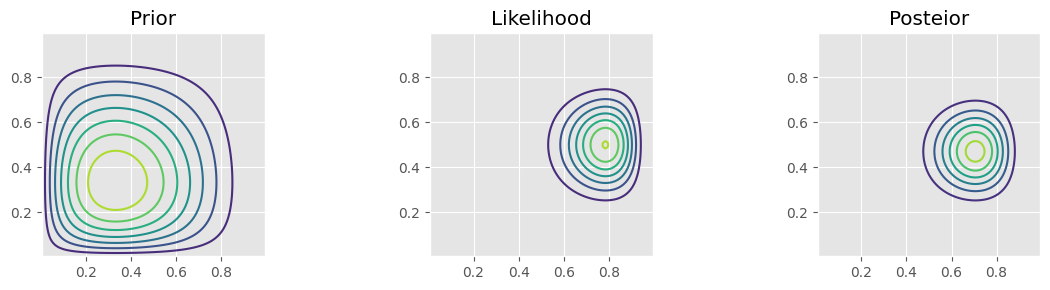

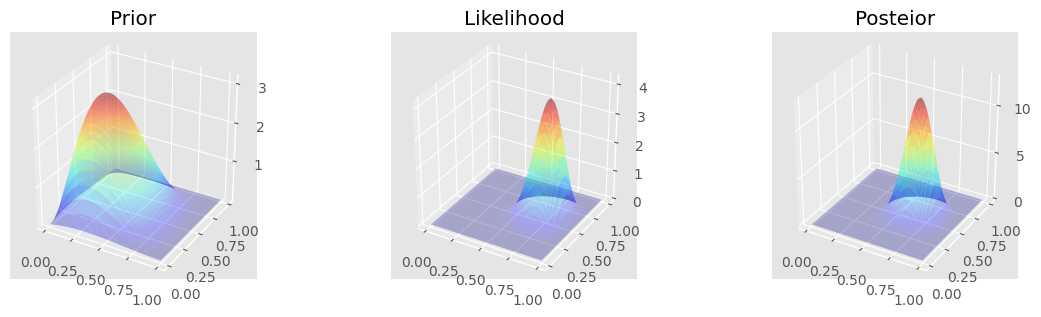

In [54]:
a = 2
b = 3

z1 = 11
N1 = 14
z2 = 7
N2 = 14

prior = stats.beta(a, b).pdf(X) * stats.beta(a, b).pdf(Y)
likelihood = bern2(X, Y, z1, z2, N1, N2)
posterior = stats.beta(a + z1, b + N1 - z1).pdf(X) * stats.beta(a + z2, b + N2 - z2).pdf(Y)
make_plots(X, Y, prior, likelihood, posterior)
make_plots(X, Y, prior, likelihood, posterior, projection='3d')

### Grid Approximation

In [55]:
def c2d(thetas1, thetas2, pdf):
    width1 = thetas1[1] - thetas1[0]
    width2 = thetas2[1] - thetas2[0]
    area = width1 * width2
    pmf = pdf * area
    pmf /= pmf.sum()
    return pmf

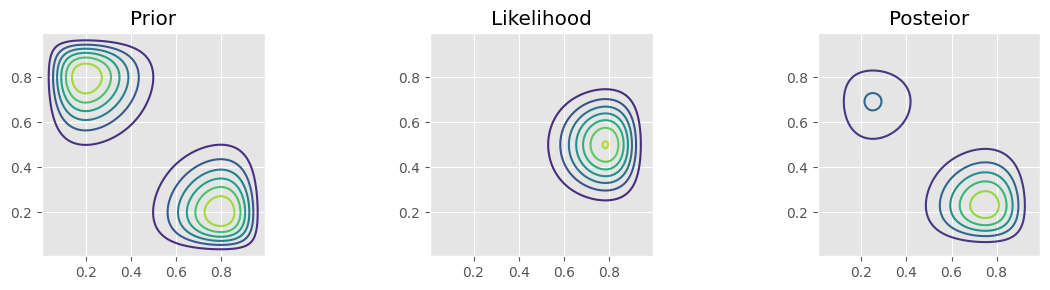

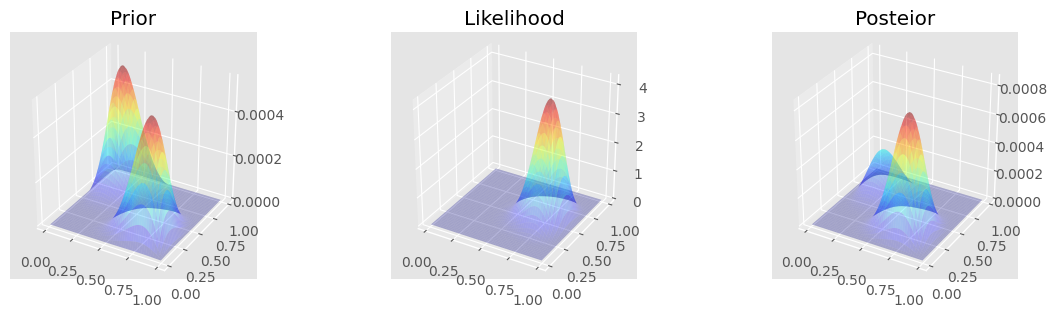

In [56]:
_prior = bern2(X, Y, 2, 8, 10, 10) + bern2(X, Y, 8, 2, 10, 10)
prior_grid = c2d(thetas1, thetas2, _prior)
_likelihood = bern2(X, Y, 1, 1, 2, 3)
posterior_grid = _likelihood * prior_grid
posterior_grid /= posterior_grid.sum()
make_plots(X, Y, prior_grid, likelihood, posterior_grid)
make_plots(X, Y, prior_grid, likelihood, posterior_grid, projection='3d')

### Metropolis

In [57]:
a = 2
b = 3

z1 = 11
N1 = 14
z2 = 7
N2 = 14

prior = lambda theta1, theta2: stats.beta(a, b).pdf(theta1) * stats.beta(a, b).pdf(theta2)
lik = partial(bern2, z1=z1, z2=z2, N1=N1, N2=N2)
target = lambda theta1, theta2: prior(theta1, theta2) * lik(theta1, theta2)

theta = np.array([0.5, 0.5])
niters = 10000
burnin = 500
sigma = np.diag([0.2,0.2])

thetas = np.zeros((niters-burnin, 2), np.float)
for i in range(niters):
    new_theta = stats.multivariate_normal(theta, sigma).rvs()
    p = min(target(*new_theta)/target(*theta), 1)
    if np.random.rand() < p:
        theta = new_theta
    if i >= burnin:
        thetas[i-burnin] = theta

<ipython-input-57-efcbbccf524c>:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  thetas = np.zeros((niters-burnin, 2), np.float)


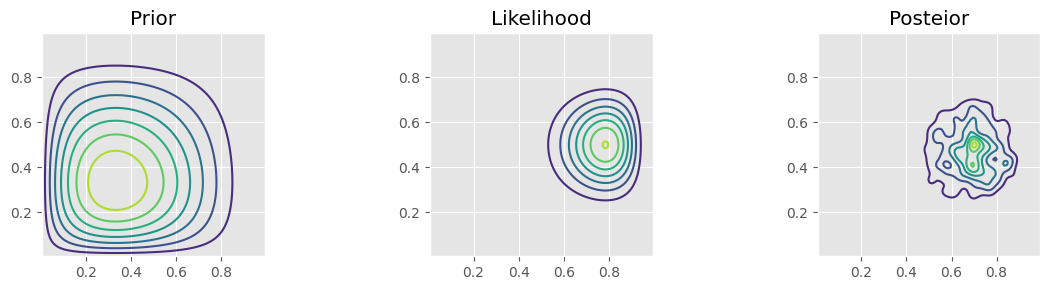

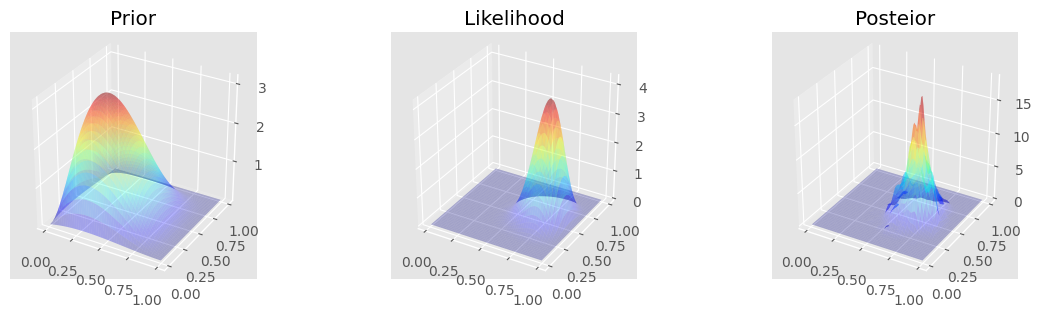

In [58]:
kde = stats.gaussian_kde(thetas.T)
XY = np.vstack([X.ravel(), Y.ravel()])
posterior_metroplis = kde(XY).reshape(X.shape)
make_plots(X, Y, prior(X, Y), lik(X, Y), posterior_metroplis)
make_plots(X, Y, prior(X, Y), lik(X, Y), posterior_metroplis, projection='3d')

### Gibbs

In [59]:
a = 2
b = 3

z1 = 11
N1 = 14
z2 = 7
N2 = 14

prior = lambda theta1, theta2: stats.beta(a, b).pdf(theta1) * stats.beta(a, b).pdf(theta2)
lik = partial(bern2, z1=z1, z2=z2, N1=N1, N2=N2)
target = lambda theta1, theta2: prior(theta1, theta2) * lik(theta1, theta2)

theta = np.array([0.5, 0.5])
niters = 10000
burnin = 500
sigma = np.diag([0.2,0.2])

thetas = np.zeros((niters-burnin,2), np.float)
for i in range(niters):
    theta = [stats.beta(a + z1, b + N1 - z1).rvs(), theta[1]]
    theta = [theta[0], stats.beta(a + z2, b + N2 - z2).rvs()]

    if i >= burnin:
        thetas[i-burnin] = theta

<ipython-input-59-d842487a825a>:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  thetas = np.zeros((niters-burnin,2), np.float)


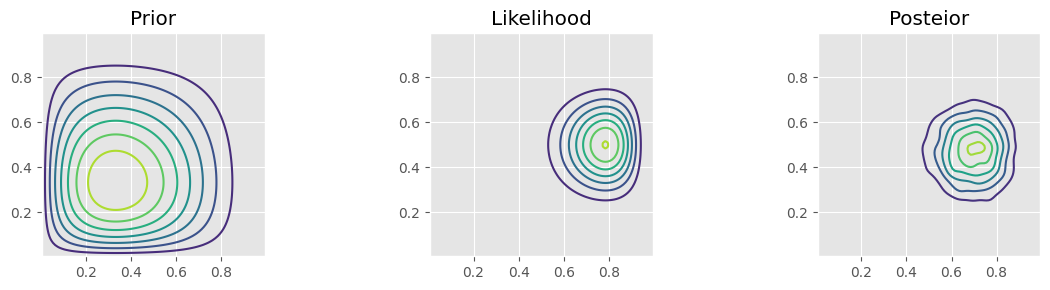

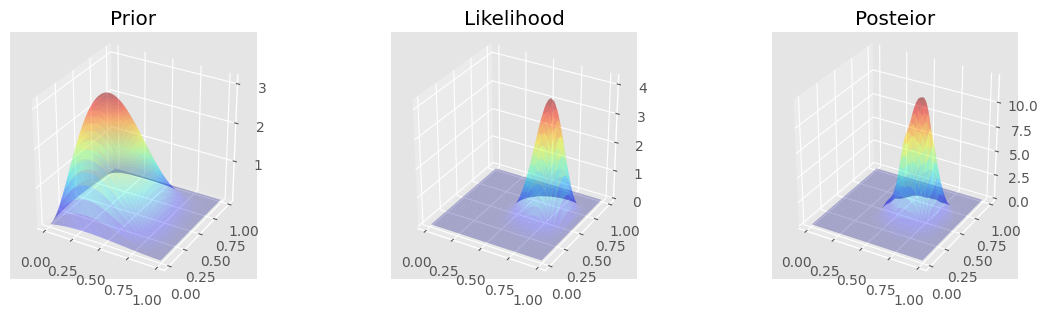

In [60]:
kde = stats.gaussian_kde(thetas.T)
XY = np.vstack([X.ravel(), Y.ravel()])
posterior_gibbs = kde(XY).reshape(X.shape)
make_plots(X, Y, prior(X, Y), lik(X, Y), posterior_gibbs)
make_plots(X, Y, prior(X, Y), lik(X, Y), posterior_gibbs, projection='3d')